In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## 解題步驟：

1. 讀取 x_train.npy, y_train.npy, x_test.npy, y_test.npy
2. 將 training dataset 再切分為 training set, validation set (圖一)
3. 先以上課的知識調整出一個不會 over-fitting 太多的決策樹模型
4. 以 validation set 作為調整參數的基準，陸續調整其他參數 (請同學測試看看 validation 要佔多少比例，後續的調整會比較客觀)
5. 將最終調整結果與一開始的決策樹做比較，誤差是否有降低
6. 同學若也懂其他模型的知識也可以試試看一樣的做法比較看看

#### 圖一 (Train, Validation and Test)
<img src="./train_val_test.png" style="zoom:30%;" />

#### 圖二 (是我前後調整的結果)
<img src="./report.png" style="zoom:30%;" />

In [2]:
# Read data
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(876, 89) (876,)
(219, 89) (219,)
(365, 89) (365,)


In [3]:
def regression_report(y_true, pred, verbose = True):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    print(f'mse = {mse:.4f}')
    print(f'mae = {mae:.4f}')
    print(f'rmse = {rmse:.4f}')
    print(f'mape = {mape:.4f}')

## 請同學先依照上課的知識，調整一個沒有 overfitting 的決策樹，請以 mape 作為參考誤差指標，較容易看出關係

In [4]:
DT = DecisionTreeRegressor(
    criterion = 'mae', max_depth = 25, min_samples_split = 3,
    min_samples_leaf = 4, max_features = 'sqrt', ccp_alpha = 200)
DT.fit(x_train, y_train)

print('Train report')
pred = DT.predict(x_train)
regression_report(y_train, pred)

print()

print('Validation report')
pred = DT.predict(x_val)
regression_report(y_val, pred)

print()

print('Test report')
pred = DT.predict(x_test)
regression_report(y_test, pred)

Train report
mse = 1314850597.5382
mae = 22679.0582
rmse = 36260.8687
mape = 0.1371

Validation report
mse = 1382411835.8642
mae = 27739.2671
rmse = 37180.7993
mape = 0.1554

Test report
mse = 2208767536.3541
mae = 27424.9137
rmse = 46997.5269
mape = 0.1498


## 調整 決策樹參數
### 請同學從 criterion 的設定中，判斷這組資料集裡的 outlier 多嗎？

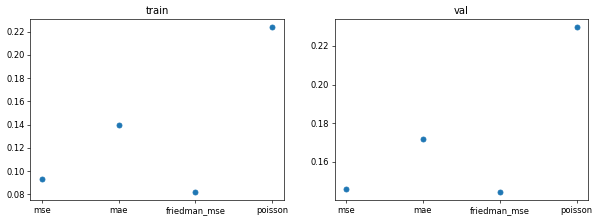

In [5]:
params = ['mse', 'mae', 'friedman_mse', 'poisson']
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(
            criterion = param, max_depth = 25, min_samples_split = 3, 
            min_samples_leaf = 4, max_features = 'sqrt', ccp_alpha = 200)
    DT.fit(x_train, y_train)
    
    pred = DT.predict(x_train)
    train_loss[i] = MAPE(pred, y_train)
    
    pred = DT.predict(x_val)
    val_loss[i] = MAPE(pred, y_val)
    
plt.figure(figsize = (12,4), dpi = 60)
plt.subplot(1, 2, 1)
plt.title('train')
plt.scatter(x = params, y= train_loss)

plt.subplot(1, 2, 2)
plt.title('val')
plt.scatter(x = params, y= val_loss)

plt.show()

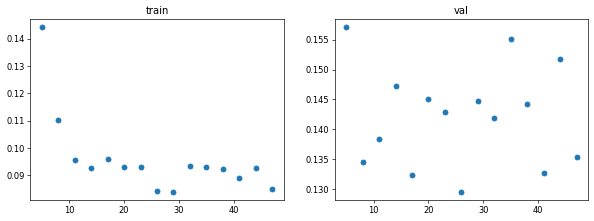

In [14]:
# Tuning max_depth
params = np.arange(5, 50, 3)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(
                criterion = 'friedman_mse', max_depth = param, min_samples_split = 3,
                min_samples_leaf = 4, max_features = 'sqrt', ccp_alpha = 200
            )
    DT.fit(x_train, y_train)

    pred = DT.predict(x_train)
    train_loss[i] = MAPE(pred, y_train)

    pred = DT.predict(x_val)
    val_loss[i] = MAPE(pred, y_val)

plt.figure(figsize=(12, 4), dpi = 60)
plt.subplot(1, 2, 1)
plt.title('train')
plt.scatter(x = params, y = train_loss)

plt.subplot(1, 2, 2)
plt.title('val')
plt.scatter(x = params, y = val_loss)

plt.show()

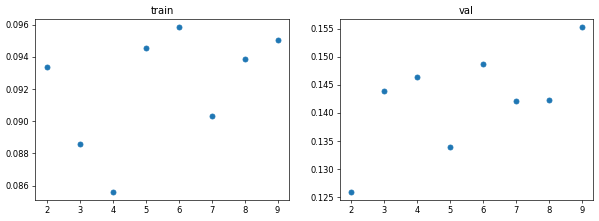

In [15]:
# Tuning min_samples_split
params = np.arange(2, 10, 1)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(
                criterion = 'friedman_mse', max_depth = 25, min_samples_split = param,
                min_samples_leaf = 4, max_features = 'sqrt', ccp_alpha = 200
            )
    DT.fit(x_train, y_train)

    pred = DT.predict(x_train)
    train_loss[i] = MAPE(pred, y_train)

    pred = DT.predict(x_val)
    val_loss[i] = MAPE(pred, y_val)

plt.figure(figsize=(12, 4), dpi = 60)
plt.subplot(1, 2, 1)
plt.title('train')
plt.scatter(x = params, y = train_loss)

plt.subplot(1, 2, 2)
plt.title('val')
plt.scatter(x = params, y = val_loss)

plt.show()

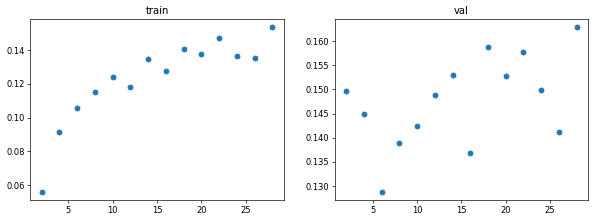

In [16]:
# Tuning min_samples_leaf
params = np.arange(2, 30, 2)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(
                criterion = 'friedman_mse', max_depth = 25, min_samples_split = 5,
                min_samples_leaf = param, max_features = 'sqrt', ccp_alpha = 200
            )
    DT.fit(x_train, y_train)

    pred = DT.predict(x_train)
    train_loss[i] = MAPE(pred, y_train)

    pred = DT.predict(x_val)
    val_loss[i] = MAPE(pred, y_val)

plt.figure(figsize=(12, 4), dpi = 60)
plt.subplot(1, 2, 1)
plt.title('train')
plt.scatter(x = params, y = train_loss)

plt.subplot(1, 2, 2)
plt.title('val')
plt.scatter(x = params, y = val_loss)

plt.show()

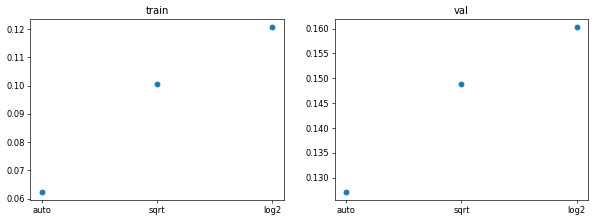

In [17]:
# Tuning max_featues
params = ['auto', 'sqrt', 'log2']
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i, param in enumerate(params):
    DT = DecisionTreeRegressor(
                criterion = 'friedman_mse', max_depth = 25, min_samples_split = 5,
                min_samples_leaf = 5, max_features = param, ccp_alpha = 200
            )
    DT.fit(x_train, y_train)

    pred = DT.predict(x_train)
    train_loss[i] = MAPE(pred, y_train)

    pred = DT.predict(x_val)
    val_loss[i] = MAPE(pred, y_val)

plt.figure(figsize=(12, 4), dpi = 60)
plt.subplot(1, 2, 1)
plt.title('train')
plt.scatter(x = params, y = train_loss)

plt.subplot(1, 2, 2)
plt.title('val')
plt.scatter(x = params, y = val_loss)

plt.show()


In [18]:
DT = DecisionTreeRegressor(
            criterion = 'friedman_mse', max_depth = 25, min_samples_split = 5,
            min_samples_leaf = 13, max_features = 'auto', ccp_alpha = 200
)

DT.fit(x_train, y_train)

print('Train report')
pred = DT.predict(x_train)
regression_report(y_train, pred)

print()

print('Validation report')
pred = DT.predict(x_val)
regression_report(y_val, pred)

print()

print('Test report')
pred = DT.predict(x_test)
regression_report(y_test, pred)

Train report
mse = 895009695.3311
mae = 18131.9080
rmse = 29916.7126
mape = 0.1056

Validation report
mse = 914918419.9395
mae = 21322.8241
rmse = 30247.6184
mape = 0.1306

Test report
mse = 1506770028.1383
mae = 23696.2842
rmse = 38817.1358
mape = 0.1378
